# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

# Access Dataset
- Within the Dataset, patient age and sex is provided with diagnosis for both the left and right eye being given. One hot encoding is used for the ocular conditions, each condition is represented by its own column where for each image a binary value of 1 or 0 is given to indicate the absence of presence of a disease. The labels coloumn includes the actual diagnosis label for the patient with the target column providing a binary vector representation of the conditions aligning with the individual conditions problem. 




In [3]:
df_data = pd.read_csv('dataset\\full_df.csv')
df_data.head()



,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


# Dataset Information

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

# Preparing the Data
- Splitting Data into Training, Testing and Validation Sets.

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import preprocess_input


# Split the DataFrame into training and test sets first
df_train, df_test = train_test_split(df_data, test_size=0.2, random_state=42)  # Adjust the test_size as needed

# Now, create the ImageDataGenerator for training and validation as before
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # This applies the required ResNet-50 preprocessing and also rescales 
    validation_split=0.2  # This is used to further split df_train into training and validation sets
)

# Training generator
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,  # Use the training part of the split
    directory='dataset/ODIR-5K/Training Images', 
    x_col='filename',
    y_col='target',
    subset='training',
    target_size=(224,224),  
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
validation_generator = datagen.flow_from_dataframe(
    dataframe=df_train,  # Use the training part of the split
    directory='dataset/ODIR-5K/Training Images',
    x_col='filename',
    y_col='target',
    subset='validation',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

# For the test set, you can create a separate ImageDataGenerator instance without a validation split
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,  # Use the separate test DataFrame
    directory='dataset/ODIR-5K/Training Images',
    x_col='filename',
    y_col='target',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Typically, you don't want to shuffle the test set
)

Found 4091 validated image filenames belonging to 8 classes.
Found 1022 validated image filenames belonging to 8 classes.
Found 1279 validated image filenames belonging to 8 classes.


Visualising Training Data 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


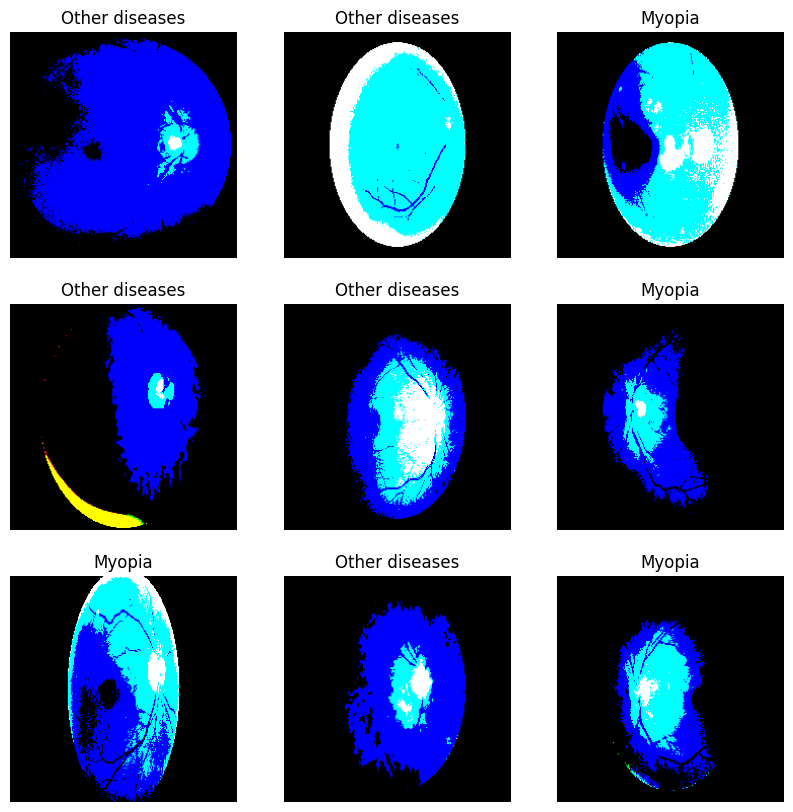

In [6]:
# Get the next batch of images from the training generator
images, labels = next(train_generator)
class_labels = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other diseases']
# Plot the images and labels
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[np.argmax(labels[i])])
    plt.axis("off")


# Training the model

In [7]:
resnet_50_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg', classes=8,
    weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_50_model.add(pretrained_model)
resnet_50_model.add(Flatten())
resnet_50_model.add(Dense(512, activation='relu'))
resnet_50_model.add(Dense(8, activation='softmax'))

In [8]:
resnet_50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 24,640,904
Trainable params: 1,053,192
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
resnet_50_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
epochs = 10
history = resnet_50_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
127/127 [==============================] - 84s 600ms/step - loss: 1.4744 - accuracy: 0.4876 - val_loss: 1.2205 - val_accuracy: 0.5323
Epoch 2/10
127/127 [==============================] - 70s 549ms/step - loss: 1.1796 - accuracy: 0.5452 - val_loss: 1.1864 - val_accuracy: 0.5575
Epoch 3/10
127/127 [==============================] - 67s 529ms/step - loss: 1.1074 - accuracy: 0.5698 - val_loss: 1.2228 - val_accuracy: 0.5302
Epoch 4/10
127/127 [==============================] - 73s 573ms/step - loss: 1.0627 - accuracy: 0.5935 - val_loss: 1.1820 - val_accuracy: 0.5696
Epoch 5/10
127/127 [==============================] - 66s 523ms/step - loss: 1.0229 - accuracy: 0.5965 - val_loss: 1.2068 - val_accuracy: 0.5433
Epoch 6/10
127/127 [==============================] - 68s 536ms/step - loss: 0.9689 - accuracy: 0.6068 - val_loss: 1.1740 - val_accuracy: 0.5353
Epoch 7/10
127/127 [==============================] - 66s 519ms/step - loss: 0.9565 - accuracy: 0.6189 - val_loss: 1.2087 - val_ac

# Evaluating Model 

Model Accuracy Graph Analysis

- Both the training and validation accuracies are quite stable, but they are not very high – hovering around 50%. This suggests the model is performing only slightly better than random chance, assuming a balanced classification task.
- There is not much difference between the training and validation accuracy, which indicates that the model is not overfitting. However, the low accuracy on both suggests underfitting, meaning the model is too simple or not properly trained to capture the complexity of the data.

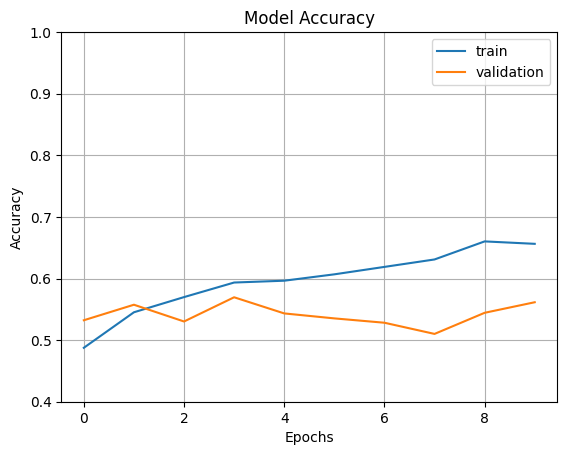

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Model Loss Graph Analysis 
- The training loss is decreasing over time, which is good as it means the model is learning and improving its performance on the training set.
- The validation loss decreases initially but then fluctuates. It doesn't show a clear increasing trend, which is positive because it suggests the model is not significantly overfitting to the training data. However, the fluctuations might indicate that the model could benefit from further tuning or that the validation data may not be representative or consistent.

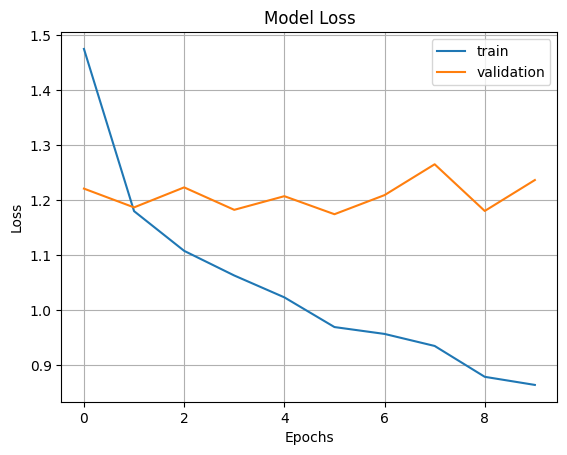

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions


40/40 [==============================] - 20s 463ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


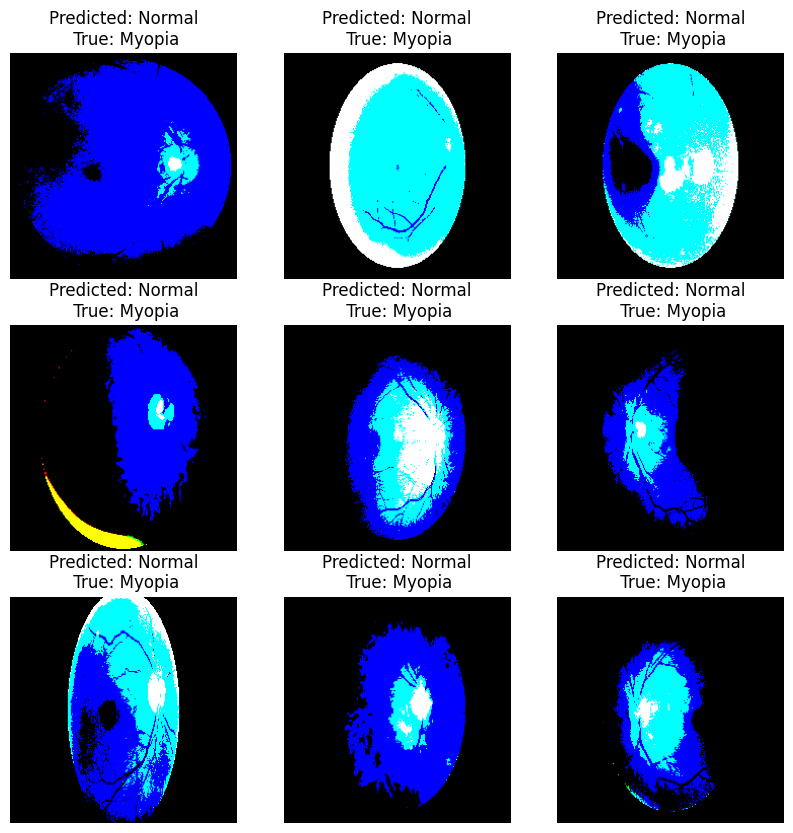

In [13]:
# Calculate the correct number of steps to cover all the samples
steps = np.ceil(test_generator.samples / test_generator.batch_size)

# Evaluate the model on the test dataset
resnet_50_model.evaluate(test_generator, steps=steps)

# Re-generate predictions with the corrected steps
predictions = resnet_50_model.predict(test_generator, steps=steps)

# Get the predicted classes again
predicted_classes = np.argmax(predictions, axis=1)

class_labels = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']

# Plot the first 9 images, their predicted labels, and the true labels
output_class=class_labels[np.argmax(predicted_classes[i])]
true_labels=class_labels[np.argmax(labels[i])]

plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Predicted: {output_class}\n True: {true_labels}')
    plt.axis("off")
    

# Predictions Result Evaluation 

In [20]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score

Classification Report 
- Helps to obtain the F1-Score which is average of the precision and recall for each class and provides a better measure of the incorrectly classified cases - making any class imbalances prominent. 

The recall for the 'Normal' class is extremely high at 99%, which indicates that the model is classifying almost every sample as 'Normal'. This has significantly distorted other metrics, and now the precision, recall, and f1-score for all other classes have fallen to 0 or near-zero values. This is a clear sign of the model being biased towards one class, potentially due to class imbalance or other issues.

In [21]:
true_classes = test_generator.classes

# Now, the number of predicted classes should match the number of true classes
# Generate the classification report again
report = classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division=0)

print(report)


              precision    recall  f1-score   support

      Normal       0.11      0.99      0.19       136
    Diabetes       0.12      0.04      0.06        48
    Glaucoma       0.00      0.00      0.00        28
    Cataract       0.00      0.00      0.00        46
         AMD       0.00      0.00      0.00        58
Hypertension       0.00      0.00      0.00        61
      Myopia       0.00      0.00      0.00       333
       Other       0.00      0.00      0.00       569

    accuracy                           0.11      1279
   macro avg       0.03      0.13      0.03      1279
weighted avg       0.02      0.11      0.02      1279



Balanced Accuracy Score 
- Calculates the average proportion of correct predictions in each class. 

The score is significantly lower than a basic random guess in a balanced dataset. As balanced accuracy score accounts for class imbalance, this score points towards poor model performance across all classes. 

In [22]:
balanced_accuracy = balanced_accuracy_score(true_classes, predicted_classes)
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy))

Balanced Accuracy: 0.1293


Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
- The ROC curve is a plot of the true positive rate against the false positive rate at various threshold settings, and the AUC measures the entire two-dimensional area underneath the entire ROC curve.

An ROC AUC of 0.4856 is close to 0.5, which would be the score for random guessing in binary classification tasks. However, in multiclass tasks, a score closer to 1 is desired. This low score indicates that the model is not distinguishing between the classes better than random chance.

In [23]:
roc_auc = roc_auc_score(test_generator.labels, predictions, average='macro', multi_class='ovo')
print('ROC AUC: {:.4f}'.format(roc_auc))

ROC AUC: 0.4856


Confusion Matrix 
- This is a table used to describe the performance of a classification model on a set of data for which the true values are known. 

The confusion matrix shows a strong diagonal line for the 'Normal' and 'Other' classes, which means the model is predominantly predicting these two classes. Virtually all other classes are being ignored or incorrectly classified as 'Normal'. This is a clear sign of class imbalance, where the model is likely biased towards the majority class.


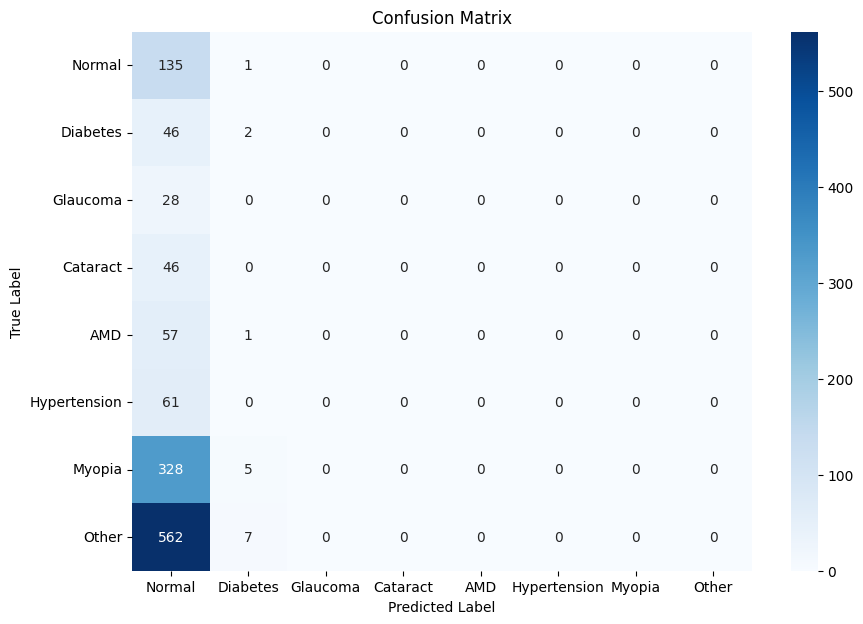

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Prediction Evaluation
- Classes normal, diabetes and others are the top 3 predicted classes, this suggests that the remaining classes are underrepresented hence the model is not using them to classify the test data.

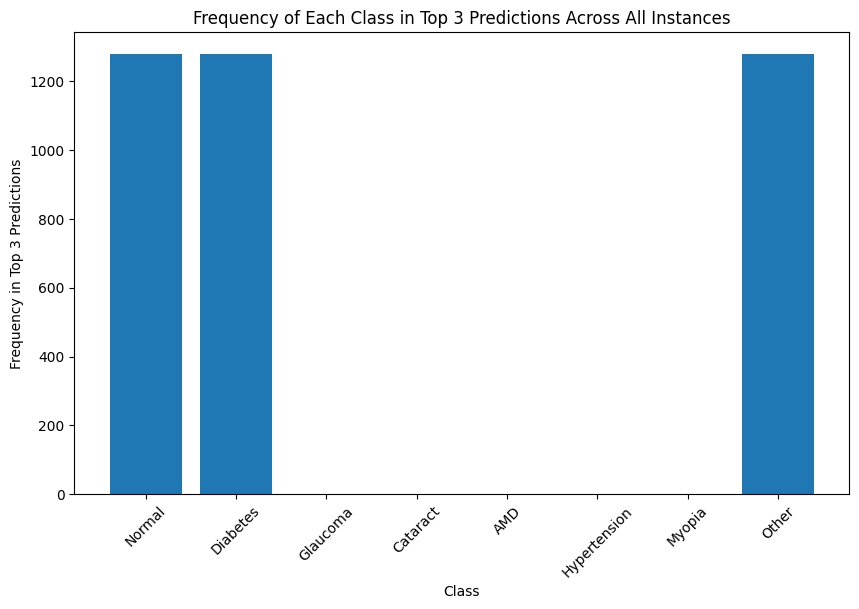

In [15]:
class_labels = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']

# Function to get top 3 indices for all predictions
def get_top3_indices(predictions):
    return predictions.argsort()[:, -3:]

# Count the frequency of each class being in the top 3
top3_indices = get_top3_indices(predictions)
class_counts = np.zeros(len(class_labels))

for indices in top3_indices:
    for index in indices:
        class_counts[index] += 1



# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Frequency in Top 3 Predictions')
plt.title('Frequency of Each Class in Top 3 Predictions Across All Instances')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Save the model
resnet_50_model.save('resnet_50_model_v1.h5')